# H&M Personalized Fashion Recommendations EDA

Downloaded from https://www.kaggle.com/competitions/h-and-m-personalized-fashion-recommendations/data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm.notebook import tqdm

In [2]:
articles = pd.read_csv("data/articles.csv")
customers = pd.read_csv("data/customers.csv")
transactions = pd.read_csv("data/transactions_train.csv")

In [3]:
articles.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [4]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [5]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


## Articles Analysis

In [6]:
# function for checking number of missing values
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [7]:
articles.shape

(105542, 25)

In [33]:
# Types of features
articles.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [9]:
# Types of features and their number of unique values
for index in articles.columns:
    print(f"{index}: number of unique values- {articles[index].nunique()}")# {articles[index].unique()} " )

article_id: number of unique values- 105542
product_code: number of unique values- 47224
prod_name: number of unique values- 45875
product_type_no: number of unique values- 132
product_type_name: number of unique values- 131
product_group_name: number of unique values- 19
graphical_appearance_no: number of unique values- 30
graphical_appearance_name: number of unique values- 30
colour_group_code: number of unique values- 50
colour_group_name: number of unique values- 50
perceived_colour_value_id: number of unique values- 8
perceived_colour_value_name: number of unique values- 8
perceived_colour_master_id: number of unique values- 20
perceived_colour_master_name: number of unique values- 20
department_no: number of unique values- 299
department_name: number of unique values- 250
index_code: number of unique values- 10
index_name: number of unique values- 10
index_group_no: number of unique values- 5
index_group_name: number of unique values- 5
section_no: number of unique values- 57
sec

In [10]:
# Check missing values
missing_data(articles)

,Total,Percent
detail_desc,416,0.394156
perceived_colour_master_name,0,0.000000
garment_group_name,0,0.000000
garment_group_no,0,0.000000
section_name,0,0.000000
section_no,0,0.000000
index_group_name,0,0.000000
index_group_no,0,0.000000
index_name,0,0.000000
index_code,0,0.000000


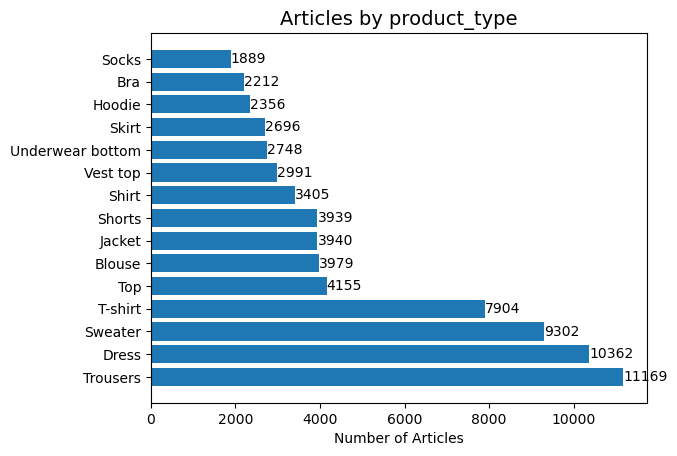

In [31]:
# Frequent product types
fig, ax = plt.subplots()
ax.set_title("Articles by product_type", fontsize=14)
prod_type = articles["product_type_name"].value_counts().reset_index().head(15)
rects = ax.barh(prod_type['index'], prod_type.product_type_name)
ax.bar_label(rects, prod_type.product_type_name)
ax.set_xlabel("Number of Articles")
plt.show
plt.savefig("articles_product_type.jpg")



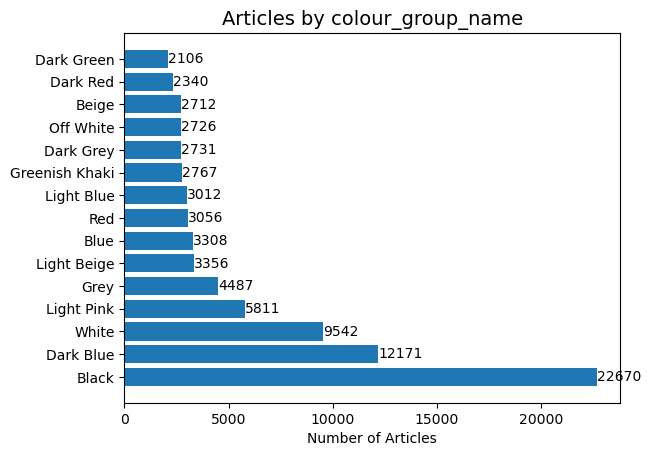

In [47]:
# Frequent colors
prod_color = articles.colour_group_name.value_counts().reset_index().head(15)

fig, ax = plt.subplots()
ax.set_title("Articles by colour_group_name", fontsize=14)
rects = ax.barh(prod_color['index'], prod_color.colour_group_name)
ax.bar_label(rects, prod_color.colour_group_name)
ax.set_xlabel("Number of Articles")
plt.show
plt.savefig("articles_colour_group_name.jpg")

## Customers Analysis

In [48]:
customers.shape

(1371980, 7)

In [49]:
customers.columns

Index(['customer_id', 'FN', 'Active', 'club_member_status',
       'fashion_news_frequency', 'age', 'postal_code'],
      dtype='object')

In [50]:
# Types of features and their number of unique values
for index in customers.columns:
    print(f"{index}: number of unique values- {customers[index].nunique()}")# {customers[index].unique()} " )

customer_id: number of unique values- 1371980
FN: number of unique values- 1
Active: number of unique values- 1
club_member_status: number of unique values- 3
fashion_news_frequency: number of unique values- 4
age: number of unique values- 84
postal_code: number of unique values- 352899


In [51]:
missing_data(customers)

,Total,Percent
Active,907576,66.150819
FN,895050,65.237831
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
postal_code,0,0.000000


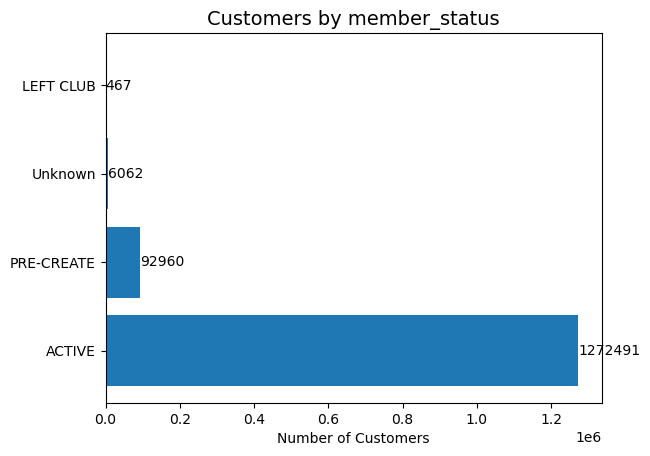

In [79]:
customers_membership = customers.club_member_status.value_counts(dropna=False)
customers_membership.index = customers_membership.index.fillna('Unknown')

fig, ax = plt.subplots()

ax.set_title("Customers by member_status", fontsize=14)
y_labels = list(map(str, customers_membership.index))

# rects = ax.barh(customers_membership.index, customers_membership.values)
# Assign numerical values for y-axis positions
y_positions = range(len(customers_membership))

# Create barh plot with numerical y-axis
rects = ax.barh(y_positions, customers_membership.values)

# Set y-axis labels
ax.set_yticks(y_positions)
ax.set_yticklabels(customers_membership.index)
ax.bar_label(rects, customers_membership.values)
ax.set_xlabel("Number of Customers")
plt.show
plt.savefig("customers_club_member_status.jpg")

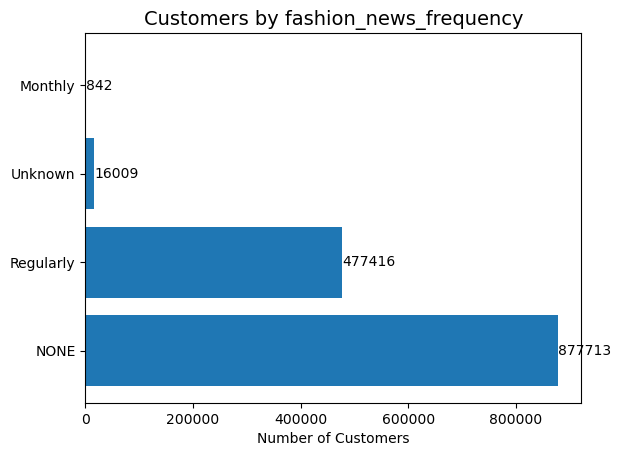

In [81]:
customers["fashion_news_frequency"] = customers["fashion_news_frequency"].replace({"None":"NONE"})
customers_news = customers.fashion_news_frequency.value_counts(dropna=False)
customers_news.index = customers_news.index.fillna('Unknown')

fig, ax = plt.subplots()

ax.set_title("Customers by fashion_news_frequency", fontsize=14)
y_labels = list(map(str, customers_news.index))

# rects = ax.barh(customers_membership.index, customers_membership.values)
# Assign numerical values for y-axis positions
y_positions = range(len(customers_news))

# Create barh plot with numerical y-axis
rects = ax.barh(y_positions, customers_news.values)

# Set y-axis labels
ax.set_yticks(y_positions)
ax.set_yticklabels(customers_news.index)
ax.bar_label(rects, customers_news.values)
ax.set_xlabel("Number of Customers")
plt.show
plt.savefig("customers_news_frequency.jpg")

<function matplotlib.pyplot.show(close=None, block=None)>

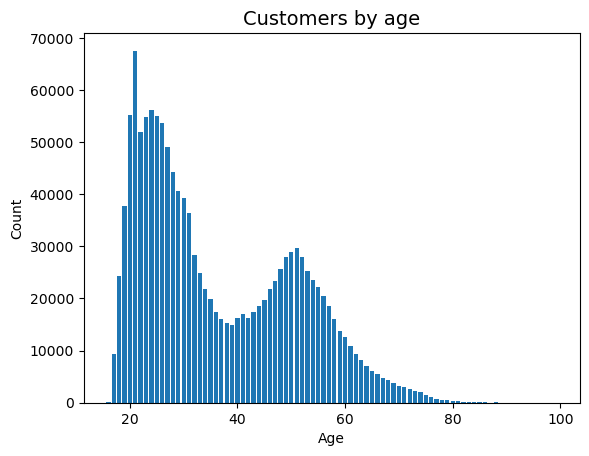

In [87]:
customers_age = customers['age'].value_counts()
customers_age = customers_age.sort_index()
fig, ax = plt.subplots()

ax.set_title("Customers by age", fontsize=14)
ax.set_xlabel("Age")
ax.set_ylabel("Count")
ax.bar(customers_age.index, customers_age.values)
plt.show

## Transactions

In [88]:
transactions.shape

(31788324, 5)

In [89]:
missing_data(transactions)

,Total,Percent
t_dat,0,0.0
customer_id,0,0.0
article_id,0,0.0
price,0,0.0
sales_channel_id,0,0.0


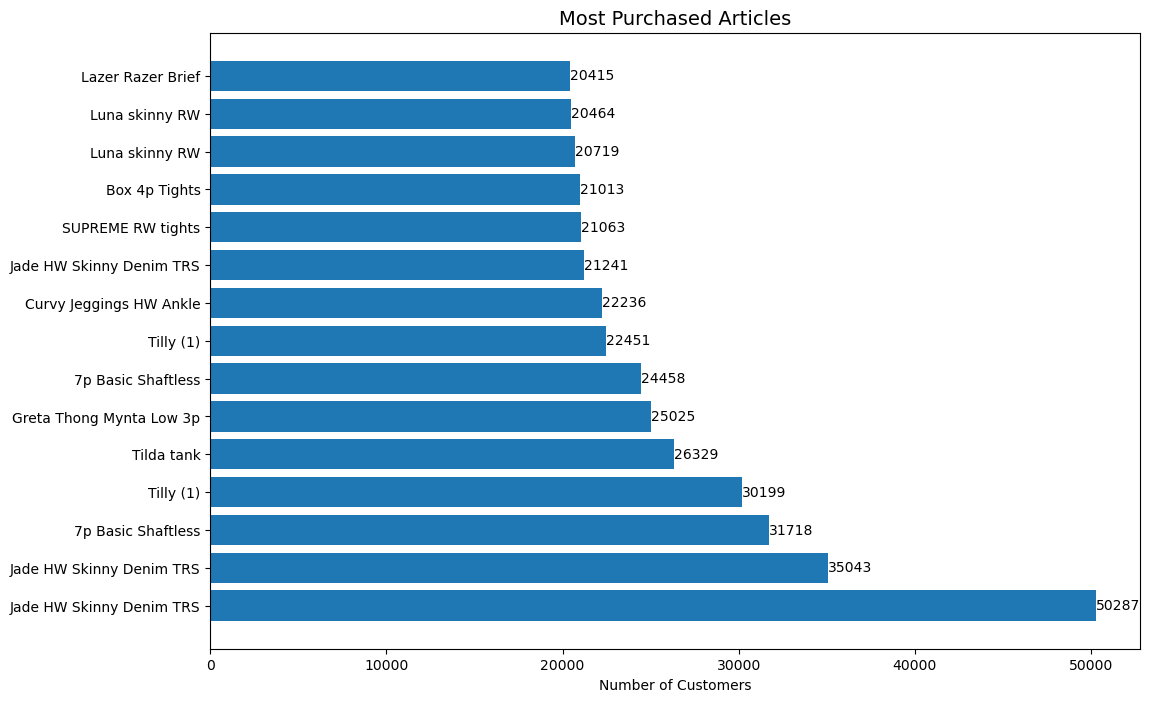

In [105]:
most_purchased = transactions.article_id.value_counts().reset_index().head(15)
most_purchased.columns = ["article_id", "count"]
most_purchased = pd.merge(most_purchased, articles, on="article_id")[["article_id", "count", "prod_name"]]

fig, ax = plt.subplots(figsize=(12,8))
ax.set_title("Most Purchased Articles", fontsize=14)

y_labels = list(map(str, customers_news.index))

# Assign numerical values for y-axis positions
y_positions = range(len(most_purchased))

# Create barh plot with numerical y-axis
rects = ax.barh(y_positions, most_purchased['count'])

# Set y-axis labels
ax.set_yticks(y_positions)
ax.set_yticklabels(most_purchased.prod_name)
ax.bar_label(rects, most_purchased['count'])
ax.set_xlabel("Number of Customers")

plt.show
plt.savefig("most_purchased_articles.jpg")

In [106]:
transactions.t_dat = pd.to_datetime(transactions.t_dat)
transactions = transactions[['t_dat','customer_id','article_id']]
transactions['year'] = (transactions.t_dat.dt.year-2000).astype('int8')
transactions['month'] = (transactions.t_dat.dt.month).astype('int8')
transactions['day'] = (transactions.t_dat.dt.day).astype('int8')
del transactions['t_dat']
transactions

,customer_id,article_id,year,month,day
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,18,9,20
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,18,9,20
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,18,9,20
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,18,9,20
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,18,9,20
...,...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,20,9,22
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,20,9,22
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,20,9,22
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,20,9,22


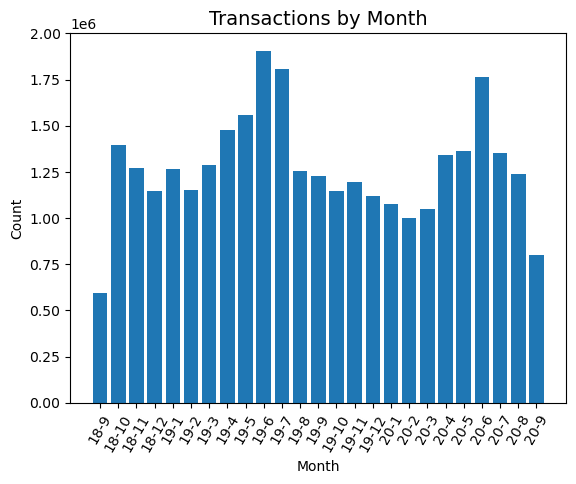

In [121]:
transactions_by_month = transactions.groupby(['year','month']).count()
transactions_by_month = transactions_by_month['customer_id']

months = transactions_by_month.index
months = [f"{y}-{m}" for (y,m) in months]

fig, ax = plt.subplots()

ax.set_title("Transactions by Month", fontsize=14)
ax.set_xlabel("Month")
ax.set_ylabel("Count")
ax.bar(months, transactions_by_month.values)
plt.xticks(rotation=60)
plt.show
plt.savefig("transactions_by_month.jpg")